## 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Load the dataset into the tool

In [2]:
import pandas as pd
# reading data from csv file
data = pd.read_csv("Housing.csv")

In [3]:
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [4]:
data.shape

(545, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


## 3. Perform Below Visualizations.
* Univariate Analysis
* Bi-Variate Analysis
* Multi-Variate Analysis

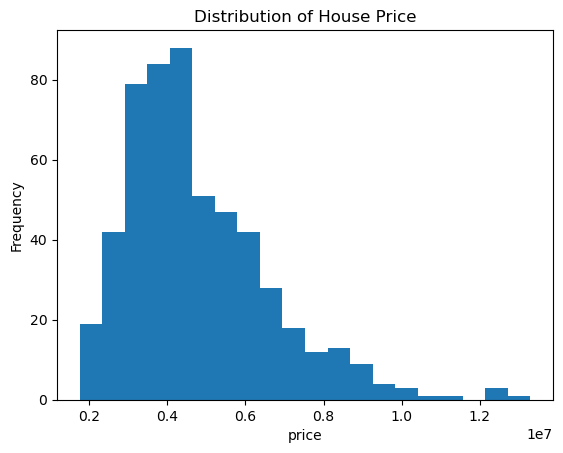

In [6]:
# Univariate Analysis - House Price
plt.hist(data['price'], bins=20)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Price')
plt.show()

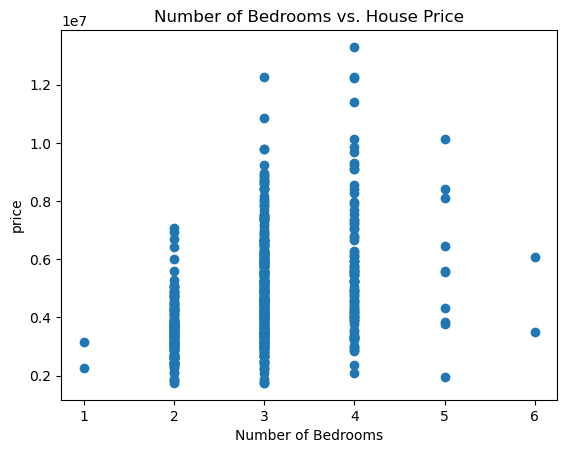

In [7]:
# Bi-Variate Analysis - Number of Bedrooms vs. House Price
plt.scatter(data['bedrooms'], data['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('price')
plt.title('Number of Bedrooms vs. House Price')
plt.show()

C:\Users\91934\AppData\Local\Temp\ipykernel_5012\147526740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


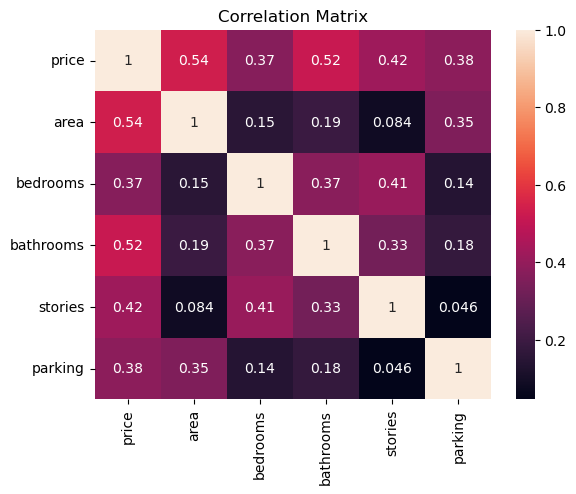

In [8]:
# Multi-Variate Analysis - Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


## 4. Perform descriptive statistics on the dataset.

In [9]:
# Descriptive statistics
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 5. Check for Missing values and deal with them.

In [10]:
# Check for missing values in the dataset
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

## 6. Find the outliers and replace them outliers

In [11]:
# Find outliers and replace them with median
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['price'] = np.where((data['price'] < lower_bound) | (data['price'] > upper_bound), data['price'].median(), data['price'])


In [12]:
display(Q1)

3430000.0

In [13]:
display(Q3)

5740000.0

In [14]:
display(IQR)

2310000.0

In [15]:
display(lower_bound)
display(upper_bound)

-35000.0

9205000.0

In [16]:
display(data['price'])

0      4340000.0
1      4340000.0
2      4340000.0
3      4340000.0
4      4340000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

<Axes: >

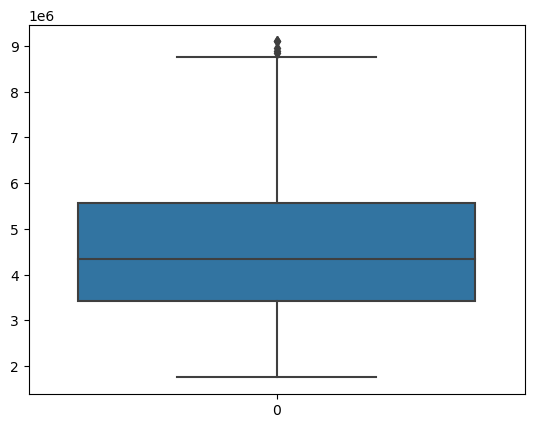

In [17]:
sns.boxplot(data.price)

## 7. Check for Categorical columns and perform encoding.

In [18]:
print(data.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')


In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
categorical_cols = ['furnishingstatus', 'basement']

# Perform label encoding
encoder = OrdinalEncoder()
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])



In [20]:
display(data[categorical_cols])

,furnishingstatus,basement
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
540,2.0,1.0
541,1.0,0.0
542,2.0,0.0
543,0.0,0.0


## 8. Split the data into dependent and independent variables.

In [21]:
# Split the data into X (features) and y (target variable)
X = data.drop('price', axis=1)
y = data['price']


## 9. Scale the independent variables

In [22]:
print(X.dtypes)


area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement            float64
hotwaterheating      object
airconditioning      object
parking               int64
furnishingstatus    float64
dtype: object


In [23]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [24]:
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000.0,7420,4,2,3,yes,no,0.0,no,yes,2,0.0
1,4340000.0,8960,4,4,4,yes,no,0.0,no,yes,3,0.0
2,4340000.0,9960,3,2,2,yes,no,1.0,no,no,2,1.0
3,4340000.0,7500,4,2,2,yes,no,1.0,no,yes,3,0.0
4,4340000.0,7420,4,1,2,yes,yes,1.0,no,yes,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,1.0,no,no,2,2.0
541,1767150.0,2400,3,1,1,no,no,0.0,no,no,0,1.0
542,1750000.0,3620,2,1,1,yes,no,0.0,no,no,0,2.0
543,1750000.0,2910,3,1,1,no,no,0.0,no,no,0,0.0


In [25]:
categorical_cols = ['furnishingstatus', 'mainroad']

# Perform label encoding
encoder = OrdinalEncoder()
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])


In [26]:
categorical_cols = ['furnishingstatus', 'guestroom']

# Perform label encoding
encoder = OrdinalEncoder()
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])


In [27]:
categorical_cols = ['furnishingstatus', 'hotwaterheating']

# Perform label encoding
encoder = OrdinalEncoder()
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])


In [28]:
categorical_cols = ['furnishingstatus', 'airconditioning']

# Perform label encoding
encoder = OrdinalEncoder()
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])


In [29]:
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000.0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,0.0
1,4340000.0,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0
2,4340000.0,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0
3,4340000.0,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,0.0
4,4340000.0,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,2.0
541,1767150.0,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,1.0
542,1750000.0,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,2.0
543,1750000.0,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0


In [30]:
# Split the data into dependent and independent variables
X = data.drop('price', axis=1)  # Independent variables (features)
y = data['price']  # Dependent variable (target)

In [31]:
display(X)
display(y)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,0.0
1,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0
2,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0
3,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,0.0
4,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,2.0
541,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,1.0
542,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,2.0
543,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0


0      4340000.0
1      4340000.0
2      4340000.0
3      4340000.0
4      4340000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

In [32]:
# Minmax Scaling (Scaling values between 0 and 1)
name = X.columns
name
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
X_scaled
X = pd.DataFrame(X_scaled,columns=name)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.5
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [33]:
from sklearn.preprocessing import StandardScaler

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 10. Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
542,0.135395,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
496,0.161512,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
484,0.095533,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
507,0.134021,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
252,0.564261,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5


In [36]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
239,0.161512,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0
113,0.547766,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0
325,0.124399,0.6,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.5
66,0.793814,0.2,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.333333,0.0
479,0.138144,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [37]:
y_test


239    4585000.0
113    6083000.0
325    4007500.0
66     6930000.0
479    2940000.0
         ...    
76     6650000.0
132    5810000.0
311    4123000.0
464    3080000.0
155    5530000.0
Name: price, Length: 109, dtype: float64

In [38]:
y_train

542    1750000.0
496    2695000.0
484    2870000.0
507    2590000.0
252    4515000.0
         ...    
70     6790000.0
277    4305000.0
9      4340000.0
359    3710000.0
192    5040000.0
Name: price, Length: 436, dtype: float64

## 11.Build the Model
## 12.Train the Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 13. Test the Model

In [40]:
# Test the model
y_pred = model.predict(X_test)


In [41]:
display(y_pred)

array([4762820.38139376, 6238793.29440677, 3291921.326273  ,
       4685677.04447131, 3451971.55553113, 3694756.41459477,
       5392435.48905113, 5622691.6218176 , 2976131.89129328,
       2693763.08944725, 7882542.21676692, 3103913.61011644,
       3263542.77968099, 3597702.85881815, 4108771.95236896,
       4589288.18309793, 3350227.37232082, 4873437.72971142,
       4645694.93839739, 3700013.039294  , 5490012.92294426,
       5453236.24569591, 3044573.74368226, 4585956.09718913,
       5119258.11839377, 6404672.9527739 , 3798814.73111835,
       5197584.02323963, 7353451.75526719, 3724374.88002879,
       5572814.76918884, 3573742.84830762, 6501780.04257737,
       4321886.3722662 , 3783611.9999477 , 5339690.24873999,
       5073527.33363741, 4655105.50597372, 3224341.94966872,
       4293374.45511416, 4414014.69253638, 3740667.66791876,
       6222136.48979367, 4130484.61067289, 3856170.58254184,
       4355669.42557111, 6451805.37921262, 4066929.16982781,
       3960906.20746056,

## 14. Measure the performance using Metrics.

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 983227.0624552098
Mean Squared Error (MSE): 1632793740796.7996
Root Mean Squared Error (RMSE): 1277808.1784042546
R-squared (R2): 0.45115335372870624
